# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group A**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  
- **Daan van Holten** | 20240681
- **Philippe Dutranoit** | 20240518

## 📊 Goal of the notebook

this notebook is used to predict the market data over 10 months and perform some feature selction in order to build a proper model
- we used a grid search in order to find the best parameter per feature minimising RMSE
- we etract does preidction on a csv calles Market_data_predicted to be called on the model 

# imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error



# importing relevant 
from Market_data_prediction_Functions import *

import importlib
imported_module = importlib.import_module("Market_data_prediction_Functions")
importlib.reload(imported_module)


<module 'Market_data_prediction_Functions' from '/Users/philippedutranoit/document_ordi/nova/business_case_for_data_sciense/cases/BC_DA_Siemens/Notebooks/Market_data_prediction_Functions.py'>

In [2]:
df_market = pd.read_csv('../Data/df_market.csv')
info_market = pd.read_csv('../Data/info_market.csv')
filtered_market = pd.read_csv('../Data/filtered_info_market.csv')

In [3]:
# extract a list of index codes that were find relevant in the preevious notebook
index_codes = filtered_market["Index Code"].tolist()
# only select the columns that were find relevant
df_market = df_market[["date"]+ index_codes]
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 219 non-null    object 
 1   MAB_ELE_PRO156       219 non-null    float64
 2   MAB_ELE_SHP156       219 non-null    float64
 3   MAB_ELE_SHP250       219 non-null    float64
 4   MAB_ELE_PRO392       219 non-null    float64
 5   MAB_ELE_SHP392       219 non-null    float64
 6   MAB_ELE_PRO756       219 non-null    float64
 7   MAB_ELE_SHP826       219 non-null    float64
 8   MAB_ELE_SHP840       219 non-null    float64
 9   RohiBASEMET1000_org  219 non-null    float64
 10  RohiMETMIN1000_org   219 non-null    float64
 11  RohiNATGAS1000_org   219 non-null    float64
 12  RohCOPPER1000_org    219 non-null    float64
 13  WKLWEUR840_org       219 non-null    float64
 14  PRI27380_org         219 non-null    float64
 15  PRI27276_org         219 non-null    flo

In [4]:
df_market.isna().sum()


date                   0
MAB_ELE_PRO156         0
MAB_ELE_SHP156         0
MAB_ELE_SHP250         0
MAB_ELE_PRO392         0
MAB_ELE_SHP392         0
MAB_ELE_PRO756         0
MAB_ELE_SHP826         0
MAB_ELE_SHP840         0
RohiBASEMET1000_org    0
RohiMETMIN1000_org     0
RohiNATGAS1000_org     0
RohCOPPER1000_org      0
WKLWEUR840_org         0
PRI27380_org           0
PRI27276_org           0
PRO28756_org           0
PRO28392_org           0
PRO271000_org          0
PRO27756_org           0
PRO27392_org           0
dtype: int64

# market data prediction

## Grid-Search


In [5]:
# Run the grid search on all features in your market_df (which should already be defined)
grid_search_results = grid_search_all_features(df_market, date_column='date', forecast_horizon=10)

# Optionally, print out the complete grid search results for further analysis
print("\nComplete Grid Search Results:")
for feature, result in grid_search_results.items():
    print(f"\nFeature: {feature}")
    print(result)


13:49:44 - cmdstanpy - INFO - Chain [1] start processing
13:49:44 - cmdstanpy - INFO - Chain [1] done processing
13:49:44 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO156 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0} | RMSE: 12.5164


13:49:46 - cmdstanpy - INFO - Chain [1] done processing
13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:46 - cmdstanpy - INFO - Chain [1] done processing
13:49:46 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP156 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0} | RMSE: 12.5164


13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:47 - cmdstanpy - INFO - Chain [1] start processing
13:49:47 - cmdstanpy - INFO - Chain [1] done processing
13:49:48 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP250 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 9.9337


13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:48 - cmdstanpy - INFO - Chain [1] done processing
13:49:48 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO392 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 14.9471


13:49:49 - cmdstanpy - INFO - Chain [1] done processing
13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP392 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 14.9510


13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_PRO756 | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 8.0152


13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] 

Feature: MAB_ELE_SHP826 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 7.8705


13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1]

Feature: MAB_ELE_SHP840 | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 8.0707


13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
13:49:54 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1] done processing
13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:55 - cmdstanpy - INFO - Chain [1] done processing
13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:55 - cmdstanpy - INFO - Chain [1] done processing
13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:55 - cmdstanpy - INFO - Chain [1]

Feature: RohiBASEMET1000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 37.9238


13:49:55 - cmdstanpy - INFO - Chain [1] done processing
13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:55 - cmdstanpy - INFO - Chain [1] done processing
13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:55 - cmdstanpy - INFO - Chain [1] done processing
13:49:55 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
13:49:56 - cmdstanpy - INFO - Chain [1] 

Feature: RohiMETMIN1000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5} | RMSE: 27.4670


13:49:56 - cmdstanpy - INFO - Chain [1] done processing
13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:56 - cmdstanpy - INFO - Chain [1] done processing
13:49:56 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
13:49:57 - cmdstanpy - INFO - Chain [1] start processing
13:49:57 - cmdstanpy - INFO - Chain [1] done processing
13:49:57 - cmdstanpy - INFO - Chain [1] 

Feature: RohiNATGAS1000_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.5} | RMSE: 148.8569


13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] start processing
13:49:58 - cmdstanpy - INFO - Chain [1] done processing
13:49:58 - cmdstanpy - INFO - Chain [1] 

Feature: RohCOPPER1000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5} | RMSE: 27.5758


13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:49:59 - cmdstanpy - INFO - Chain [1] done processing
13:49:59 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1]

Feature: WKLWEUR840_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 5.0} | RMSE: 0.0350


13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
13:50:01 - cmdstanpy - INFO - Chain [1] 

Feature: PRI27380_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 7.7346


13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1]

Feature: PRI27276_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 4.5704


13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1]

Feature: PRO28756_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 10.0930


13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1] done processing
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1]

Feature: PRO28392_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 19.2535


13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:05 - cmdstanpy - INFO - Chain [1] done processing
13:50:05 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1]

Feature: PRO271000_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 5.1383


13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
13:50:06 - cmdstanpy - INFO - Chain [1] start processing
13:50:06 - cmdstanpy - INFO - Chain [1] done processing
13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1] done processing
13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1] done processing
13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1]

Feature: PRO27756_org | Best Params: {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2} | RMSE: 4.3838


13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1] done processing
13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1] done processing
13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1] done processing
13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:07 - cmdstanpy - INFO - Chain [1] done processing
13:50:07 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing
13:50:08 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing
13:50:08 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing
13:50:08 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing


Feature: PRO27392_org | Best Params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2} | RMSE: 6.3997

Complete Grid Search Results:

Feature: MAB_ELE_PRO156
{'best_params': {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0}, 'best_rmse': np.float64(12.516422305129543), 'param_results': [{'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.2, 'rmse': np.float64(12.766008780036382)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.5, 'rmse': np.float64(12.801445721975039)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 1.0, 'rmse': np.float64(12.790778460610085)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 2.0, 'rmse': np.float64(12.702961178636663)}, {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 5.0, 'rmse': np.float64(12.516422305129543)}, {'seasonality_mode': 'additive', 'changepoint_prior_scale': 0.2, 'rmse': np.float64(15.858846272141713)}, {'se

## final prediction

13:50:08 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing


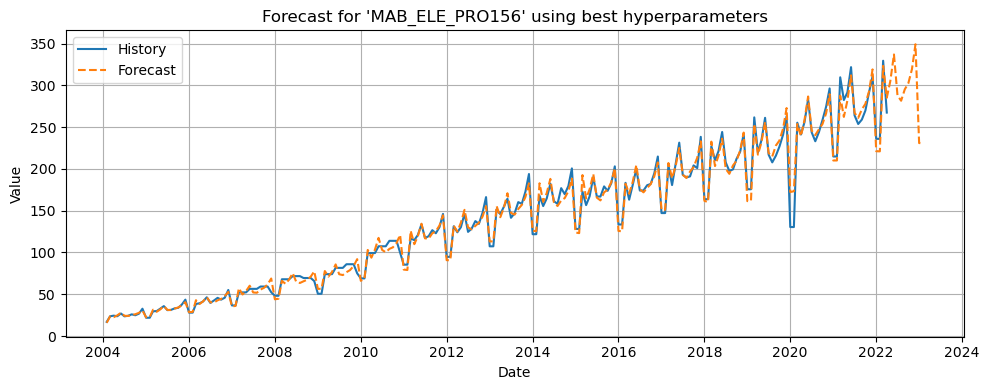

13:50:08 - cmdstanpy - INFO - Chain [1] start processing
13:50:08 - cmdstanpy - INFO - Chain [1] done processing


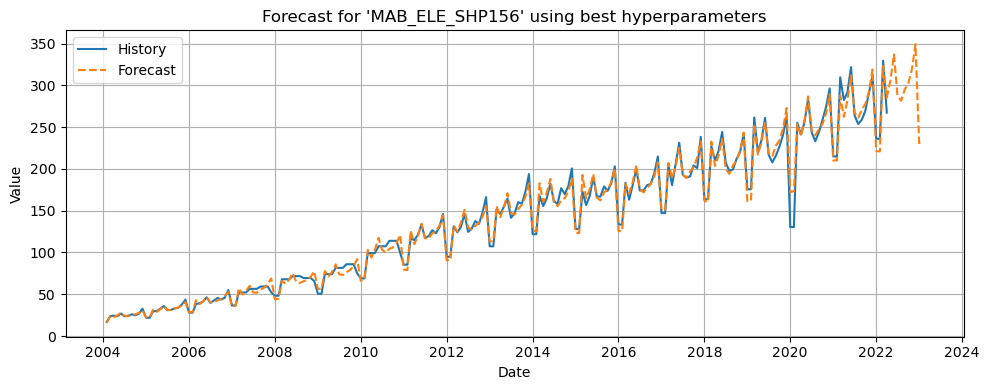

13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:09 - cmdstanpy - INFO - Chain [1] done processing


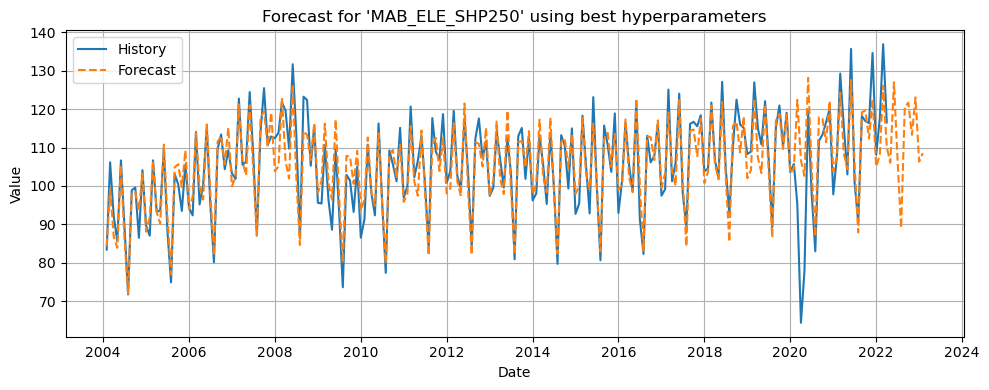

13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:09 - cmdstanpy - INFO - Chain [1] done processing


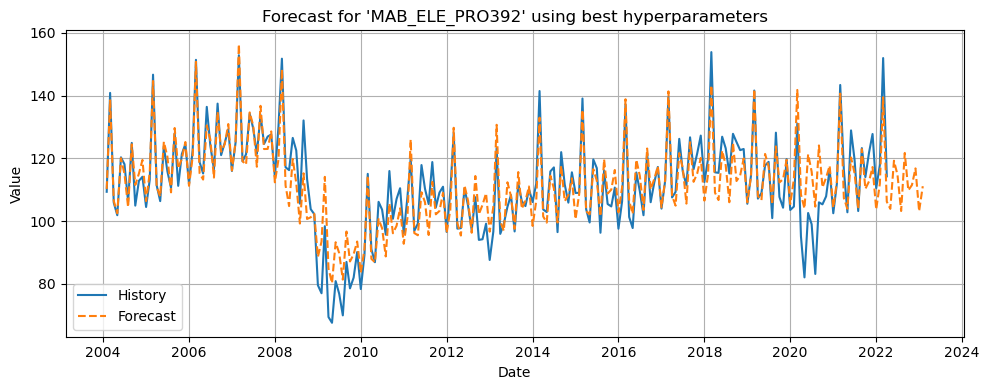

13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:09 - cmdstanpy - INFO - Chain [1] done processing


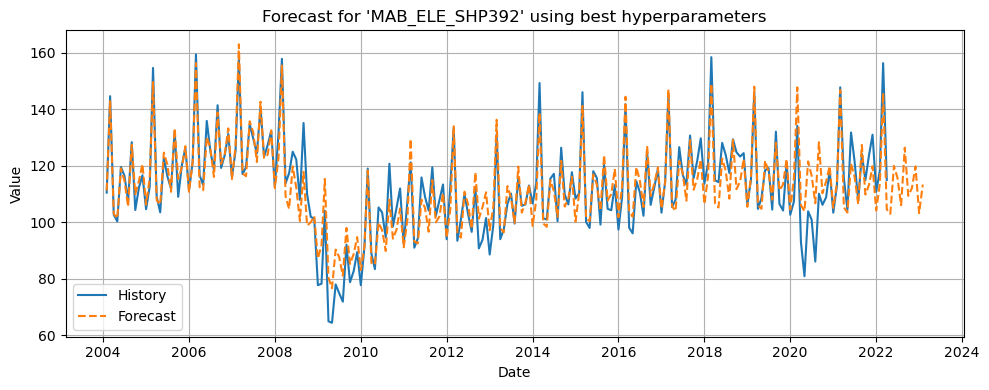

13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:09 - cmdstanpy - INFO - Chain [1] done processing


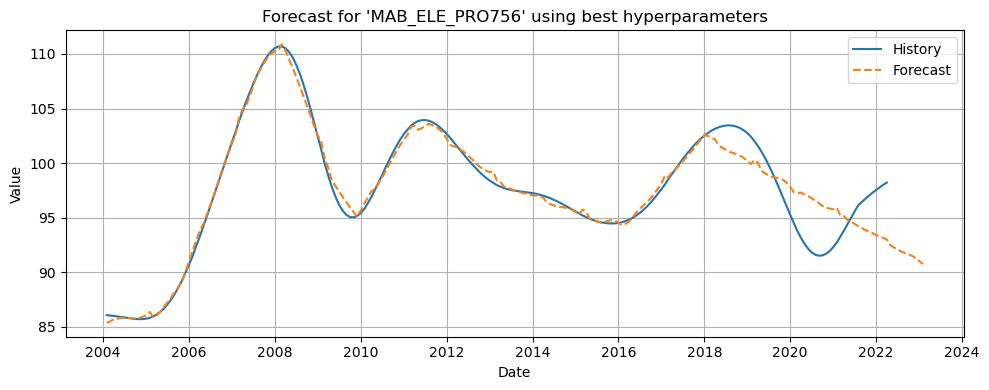

13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:09 - cmdstanpy - INFO - Chain [1] done processing


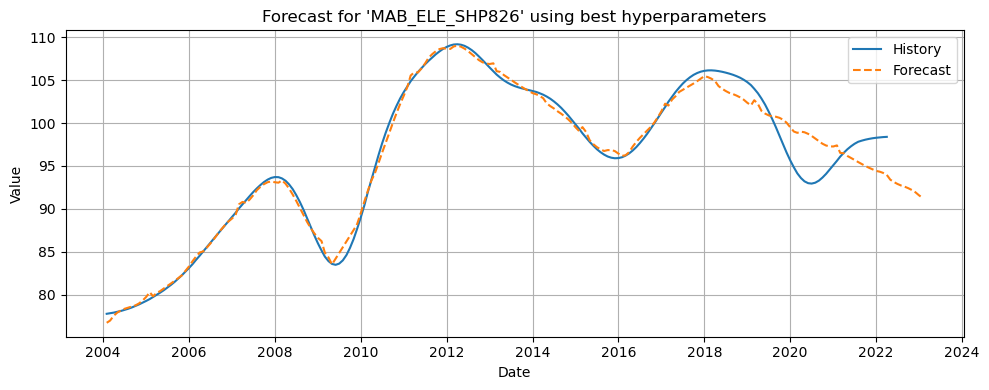

13:50:09 - cmdstanpy - INFO - Chain [1] start processing
13:50:10 - cmdstanpy - INFO - Chain [1] done processing


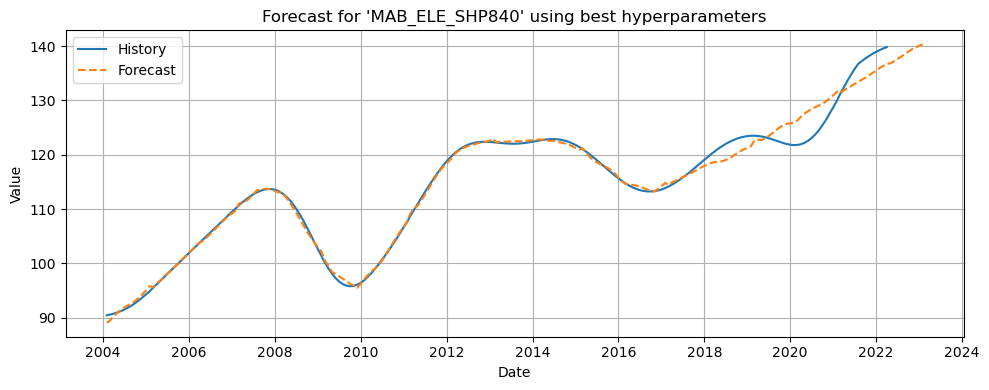

13:50:10 - cmdstanpy - INFO - Chain [1] start processing
13:50:10 - cmdstanpy - INFO - Chain [1] done processing


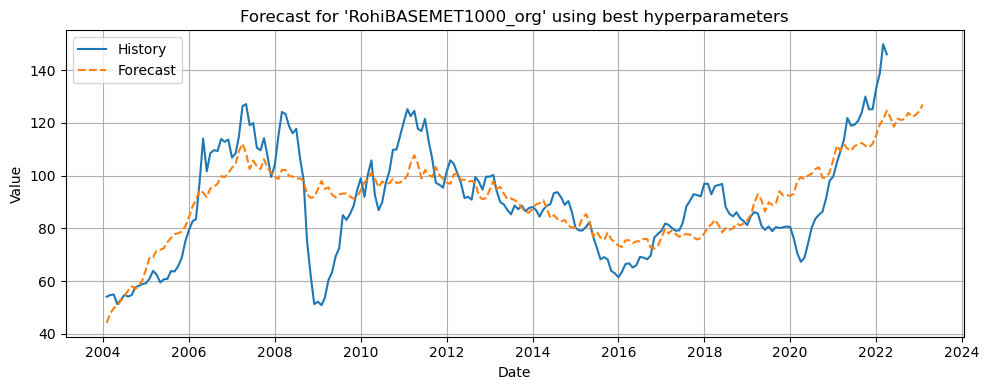

13:50:10 - cmdstanpy - INFO - Chain [1] start processing
13:50:10 - cmdstanpy - INFO - Chain [1] done processing


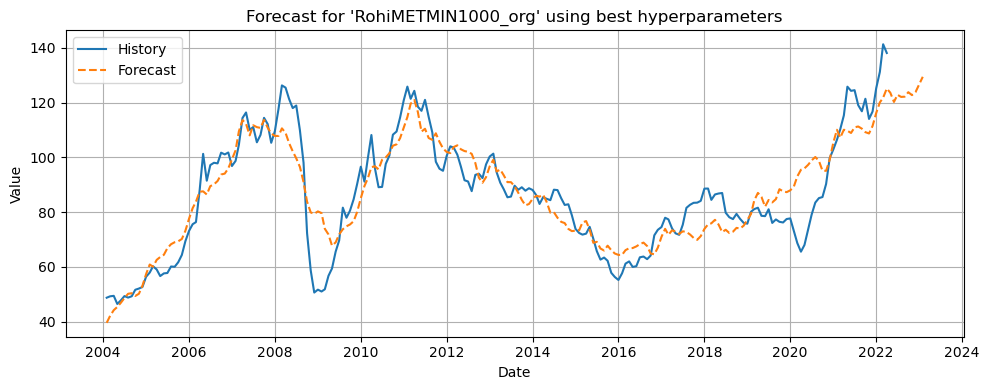

13:50:10 - cmdstanpy - INFO - Chain [1] start processing
13:50:10 - cmdstanpy - INFO - Chain [1] done processing


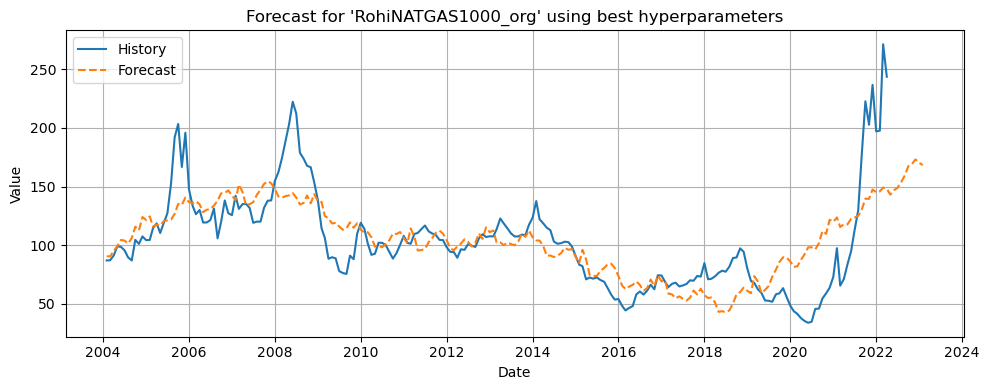

13:50:10 - cmdstanpy - INFO - Chain [1] start processing
13:50:10 - cmdstanpy - INFO - Chain [1] done processing


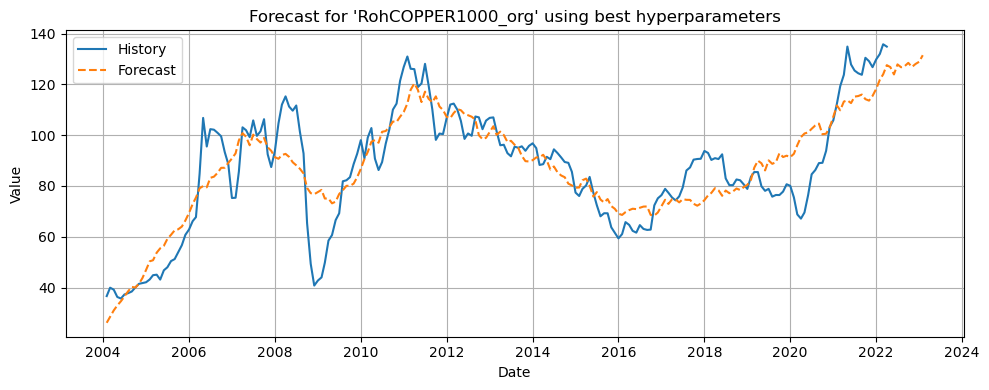

13:50:10 - cmdstanpy - INFO - Chain [1] start processing
13:50:11 - cmdstanpy - INFO - Chain [1] done processing


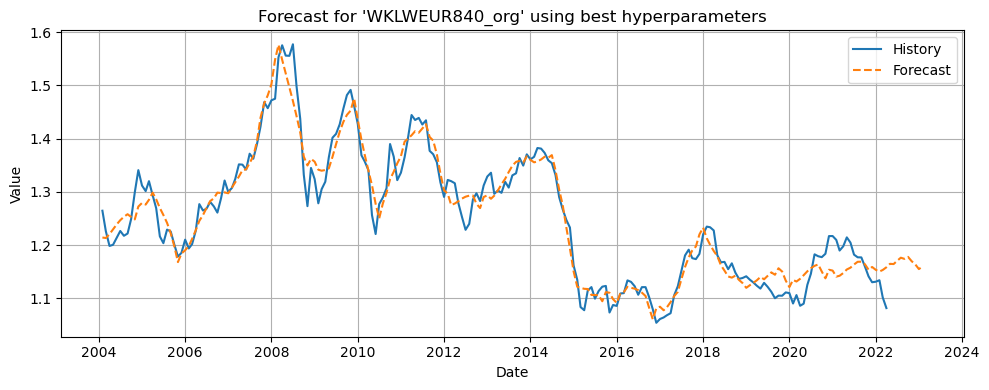

13:50:11 - cmdstanpy - INFO - Chain [1] start processing
13:50:11 - cmdstanpy - INFO - Chain [1] done processing


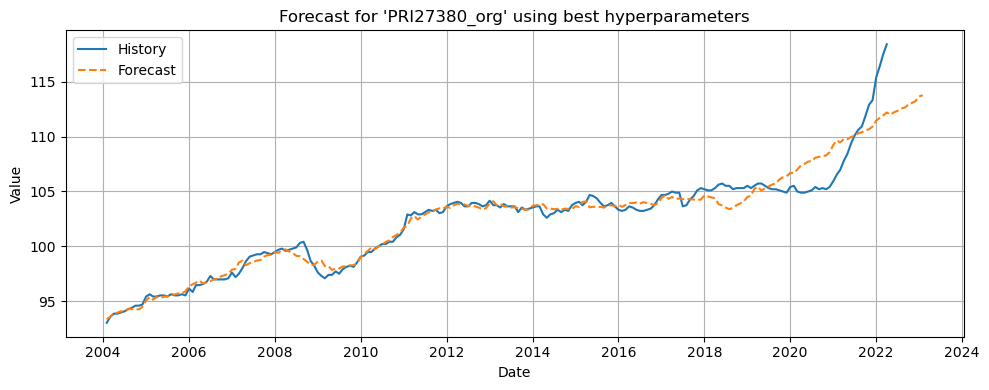

13:50:11 - cmdstanpy - INFO - Chain [1] start processing
13:50:11 - cmdstanpy - INFO - Chain [1] done processing


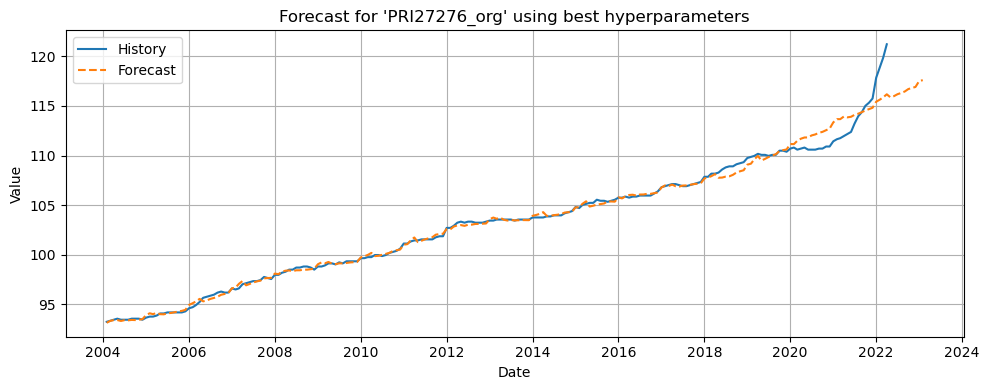

13:50:11 - cmdstanpy - INFO - Chain [1] start processing
13:50:11 - cmdstanpy - INFO - Chain [1] done processing


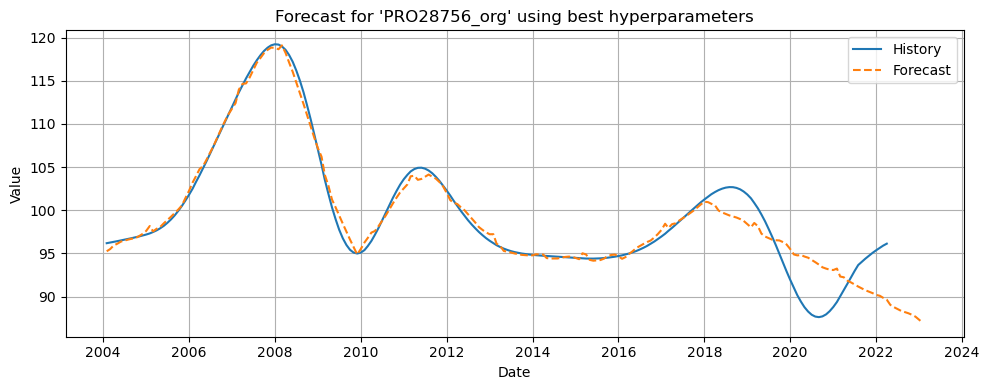

13:50:11 - cmdstanpy - INFO - Chain [1] start processing
13:50:11 - cmdstanpy - INFO - Chain [1] done processing


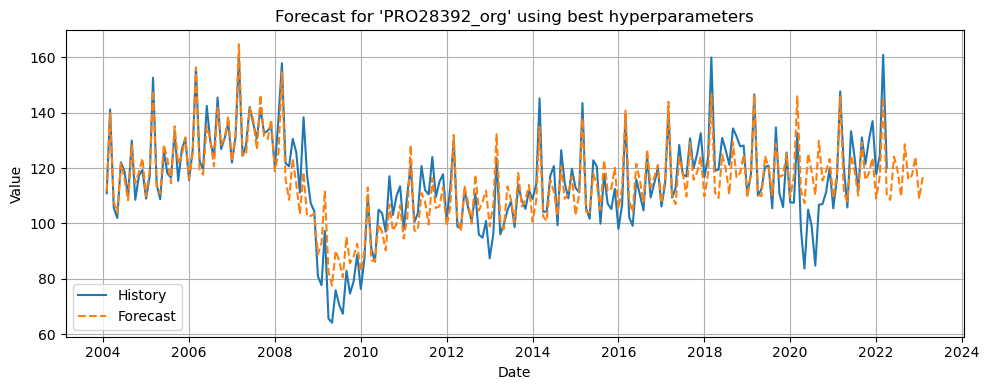

13:50:11 - cmdstanpy - INFO - Chain [1] start processing
13:50:11 - cmdstanpy - INFO - Chain [1] done processing


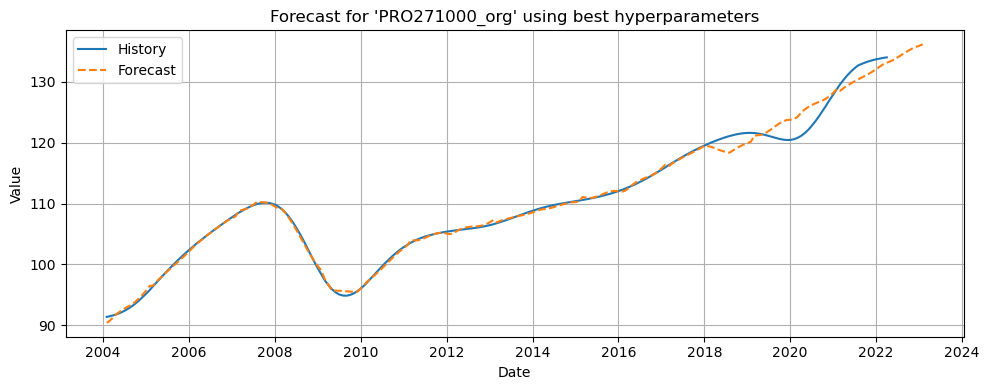

13:50:12 - cmdstanpy - INFO - Chain [1] start processing
13:50:12 - cmdstanpy - INFO - Chain [1] done processing


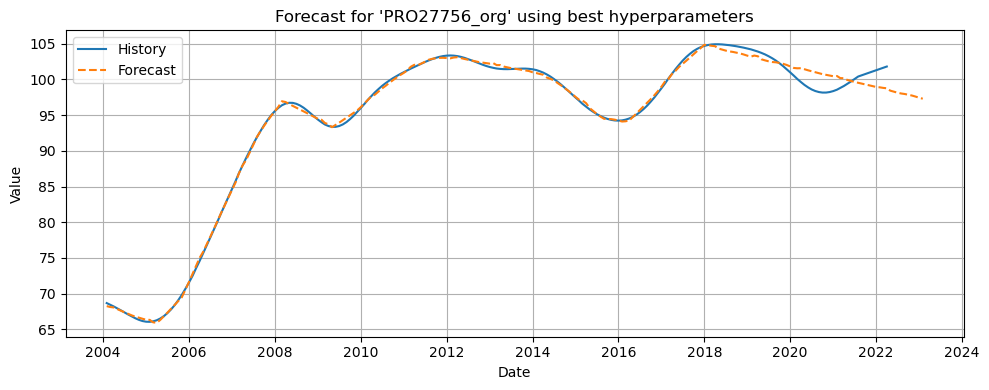

13:50:12 - cmdstanpy - INFO - Chain [1] start processing
13:50:12 - cmdstanpy - INFO - Chain [1] done processing


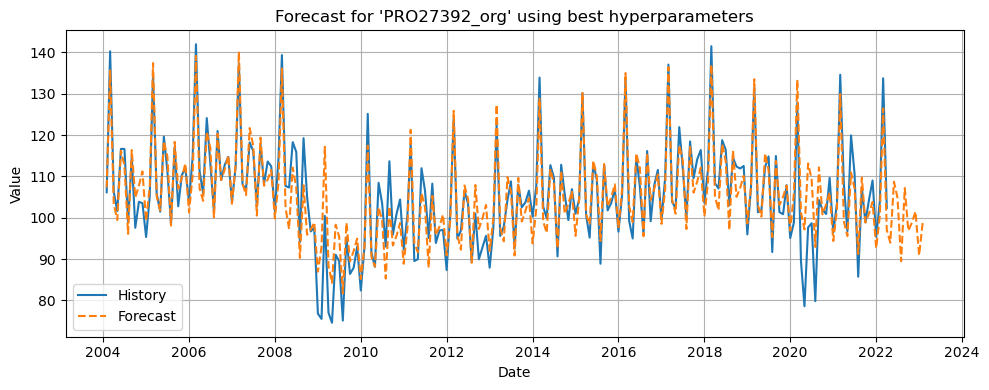

In [6]:
forecasts = specific_single_forecast_market_features_prophet(
    df_market, 
    best_params_dict=grid_search_results, 
    date_column='date', 
    forecast_horizon=10, 
    plot=True
)

In [7]:
extended_df = append_forecasts_to_market_df(df_market, forecasts, date_column='date')
extended_df.tail(15)

,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_SHP250,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP826,MAB_ELE_SHP840,RohiBASEMET1000_org,...,RohiNATGAS1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27380_org,PRI27276_org,PRO28756_org,PRO28392_org,PRO271000_org,PRO27756_org,PRO27392_org
214,2021-12-01,310.763183,310.763183,134.589504,127.771735,131.029703,97.290609,98.233705,138.576411,125.207030,...,236.488368,126.761240,1.130400,113.309631,115.748863,95.056728,136.975506,133.527660,101.137242,109.005151
215,2022-01-01,235.956129,235.956129,108.156320,110.460181,110.823532,97.547117,98.291641,138.942199,133.219393,...,196.911140,129.829146,1.131400,115.390617,117.853386,95.359690,117.861377,133.675526,101.313760,95.369065
216,2022-02-01,235.956129,235.956129,117.715770,117.879631,118.300232,97.787182,98.336496,139.268386,138.905572,...,197.523679,131.963648,1.134200,116.431107,118.905647,95.638921,124.710859,133.801232,101.486382,103.950687
217,2022-03-01,329.413367,329.413367,136.858720,152.000561,156.400634,98.009615,98.370613,139.556144,149.890871,...,271.079906,135.782207,1.101900,117.471596,119.852684,95.893397,160.954233,133.906950,101.653638,133.743932
218,2022-04-01,267.373145,267.373145,116.528738,114.262328,115.012049,98.213559,98.396144,139.807314,146.090998,...,243.436030,134.859685,1.081900,118.408043,121.220627,96.122675,120.098810,133.994879,101.813956,102.361680
219,2022-05-01,305.090426,305.090426,106.042023,103.884219,102.983505,92.487497,93.403307,136.832619,122.163873,...,143.084447,126.807820,1.164954,111.992149,115.876302,89.031458,108.512731,133.332867,98.433563,93.959483
220,2022-06-01,336.898824,336.898824,126.980699,119.237208,119.983726,92.270572,93.124726,137.206502,118.539760,...,146.780369,123.903504,1.164500,112.207230,115.989065,88.765163,124.115901,133.632946,98.282713,108.691695
221,2022-07-01,287.901363,287.901363,107.142529,114.748761,115.739227,92.089062,92.904604,137.613202,121.619500,...,148.907347,127.848598,1.170648,112.334303,116.182340,88.553110,119.228766,133.979386,98.151996,104.861802
222,2022-08-01,281.555253,281.555253,89.056202,103.200292,106.038894,91.903693,92.720332,138.050613,121.151086,...,153.602124,126.732462,1.176450,112.545746,116.308509,88.335527,109.801068,134.348998,98.039499,89.471347
223,2022-09-01,295.195250,295.195250,120.529755,121.724281,126.418340,91.782540,92.580983,138.518034,121.487514,...,159.401975,127.204848,1.174225,112.643364,116.457394,88.193619,128.617208,134.727104,97.965040,107.185849


In [8]:
extended_df.to_csv('../Data/Market_data_predicted.csv', index=False)